# Clustering on Figueroa data

Aims:
- reproduce the Figueroa patient clusters (16 clusters) and assign the same labels as in Figueroa 2009
- for each cluster, obtain signature genes and plot the heatmap
- determine the best strategy for clustering the gene probes

In [125]:
library(ade4)
library(hashmap)
library(gdata)
library(pheatmap)
library(viridis)
library(impute)

In [1]:
# load RNAseq and methylation data
#rnaseq <- read.csv('../data/Figueroa/data/GEP-filtered.tsv', sep='\t', stringsAsFactor=F,
                       header=T) # Affymetrix Human Genome U133 Plus 2.0 Array
methylation <- read.csv('../data/Figueroa/data/methylation-filtered.tsv', sep='\t', stringsAsFactor=F,
                       header=T)

In [3]:
sd.methylation <- apply(methylation[,-seq(2)], 1, function(x) sd(x))

In [272]:
probes.idx <- sd.methylation > 1
sum(sd.methylation > 1) # 3745 matching number from Figueroa
methylation.filtered <- methylation[probes.idx,]

[1] 3745

In [40]:
# clustering on patients ( 1-pearson correlation, ward clustering )
dist.matrix <- as.dist(1 - cor(methylation.filtered[,-seq(2)], method='pearson'))
dist.matrix.euc <- lingoes(dist.matrix)
clustering <- hclust(dist.matrix.euc, method='ward.D')
cluster.membership <- cutree(clustering, k = 16)
sort(table(cluster.membership))

cluster.membership
12  8 15 16 13  9 11  7  6  5  3  1  2 14  4 10 
 6  8  9  9 10 12 12 14 18 24 26 31 31 34 45 55 

In [278]:
# clustering on probes
#dist.matrix2 <- as.dist(1 - cor(t(data.matrix(methylation.filtered[,-seq(2)])), method='pearson'))
#dist.matrix.euc2 <- lingoes(dist.matrix2)
#clustering2 <- hclust(dist.matrix2, method='ward.D')
# clustering on probes
dist.matrix2 <- dist(data.matrix(methylation.filtered[,-seq(2)]), method='euclidean')
clustering2 <- hclust(dist.matrix2, method='ward.D')

In [279]:
length(clustering2$labels)

[1] 3745

In [64]:
# obtain the patient ID for each cluster
patients.id <- list(c(2172, 2189, 2202, 2215, 3309, 5353, 5365, 6363, 6881, 7150, 2235, 2249, 
                     2254, 2274, 2287, 2293, 2647, 3329, 6243, 6717, 6891, 7079, 7139, 7315, 7402, 7412),
                   c(2686, 3483, 3491, 6247, 7075, 7185, 2190, 2228, 2664, 6454, 7117, 7177, 2186,
                    2250, 2276, 2283, 2290, 2301, 2327, 2747, 2757, 3308, 3313, 3318, 3323, 4338,
                    5288, 5290, 5349, 5350, 5354, 5361, 5363, 6240, 6357, 6359, 6373, 6375, 6449, 6450, 6453, 6458, 7073, 7116,
                    7118, 7136, 7143, 7151, 7167, 7304, 7311, 7312, 7325, 7419, 7423),
                   c(2237, 2192, 3327, 2204, 2210, 2762, 2751, 2197, 2200, 2208, 2243, 2245, 2259, 2267,
                    2297, 2549, 2749, 2752, 2767, 2769, 3332, 5283, 5357, 6365, 6372, 6457, 6889, 7062,
                    7081, 7114, 7403),
                   c(1316, 2218, 2230, 2234, 2240, 2242, 2253, 2273, 2545, 2748, 2753, 6376, 7148, 7406),
                   c(7324, 7070, 7172, 7308, 2247, 2280, 2307, 2666, 2756, 3310, 3481, 4337, 4339, 4342, 
                    5355, 6236, 6356, 6370, 6374, 6379, 6455, 7058, 7059, 7071, 7077, 7084, 7137, 7146, 
                    7183, 7187, 7307, 7317, 7320, 7408),
                   c(322, 1448, 2170, 2179, 2219, 2265, 7134, 7273),
                   c(2188, 7302, 2226, 1188, 1299, 1432, 2199, 2203, 2216, 2220, 2229, 2268, 2300, 2305,
                    2326, 2764, 2765, 3492, 4335, 5289, 5348, 6456, 6887, 7147, 7154, 7161, 7180, 7301,
                    7326, 7418, 7420),
                   c(5356, 5359, 7323, 2207, 2288, 2292, 5291, 5351, 6237, 6238, 6239, 6448, 7051, 7067, 
                     7072, 7074, 7122, 7168, 7169, 7176, 7303, 7316, 7319, 7416),
                   c(4341, 6462, 4336, 6735, 6975, 7127, 7309, 5364, 7186),
                   c(2238, 2668, 3314, 6947, 7076, 5360),
                   c(6882, 2217, 2285, 3316, 5358, 6364, 7166, 7178, 7306),
                   c(2255, 2177, 2236, 2246, 2271, 2286, 2299, 2754, 6463, 7052, 7145, 7421),
                   c(2176, 2206, 4334, 2191, 2244, 1747, 2181, 2182, 2183, 2185, 2198, 2257, 2261, 2275, 
                     2278, 2282, 2284, 2289, 2291, 2670, 2672, 2771, 3311, 3312, 3321, 4333, 5286, 6241,
                    6371, 6378, 7119, 7121, 7124, 7125, 7131, 7188, 7305, 7310, 7314, 7318, 7322, 7328, 
                     7407, 7413, 7414),
                   c(2194, 1174, 2173, 2175, 2193, 2209, 2214, 2224, 2227, 2239, 2306, 3320, 3328, 3489,
                    4340, 5287, 6945, 7115),
                   c(5352, 5362, 7142, 1595, 2171, 2223, 2248, 2256, 2260, 2279, 3484, 3493),
                   c(1766, 2187, 2195, 2241, 2296, 3330, 3331, 5282, 7313, 7411))

In [50]:
patients.methylation <- read.csv('../data/Figueroa/data/GSE18700-samples.tsv', sep='\t', header=T, stringsAsFactor=F)
patients.map <- hashmap(patients.methylation$Title, patients.methylation$Accession) # map from ID to accession

In [80]:
# load methylation gene signature for each clusters
n <- 16
clusters <- list()
for (i in seq(n)) {
    clusters[[i]] <- read.xls('../data/mmc3.xls', sheet=i, skip=1, header=T, stringsAsFactor=F)
}

In [285]:
plotCluster <- function(idx) {
    for (i in idx) {
        patients.idx <- (colnames(methylation) %in% patients.map[[patients.id[[i]]]])[-seq(2)]
        probes.idx <- which(methylation$Gene %in% clusters[[i]][,1])
        cluster.data <- data.matrix(methylation[probes.idx, -seq(2)])#patients.idx]
        # z score transformation
        
        dist.matrix <- lingoes(as.dist(1 - cor(cluster.data, method='pearson')))
        clustering <- hclust(dist.matrix)
        
        cluster.zscore <- t(apply(cluster.data, 1, function(x) scale(x)))
            
        colnames(cluster.zscore) <- colnames(cluster.data)
        annotation <- data.frame(cluster=factor(patients.idx))
        rownames(annotation) <- colnames(cluster.data)

        res <- pheatmap(
          mat               = cluster.zscore, 
          annotation_col    = annotation,
          annotation_legend = F,
          annotation_names_col = F,
          color             = inferno(20),
          border_color      = NA,
          cluster_cols      = clustering,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_distance_rows = 'euclidean',
          clustering_method = "ward.D",
          fontsize          = 14,
          main              = paste0("patient cluster ", i)
        )
    }
}


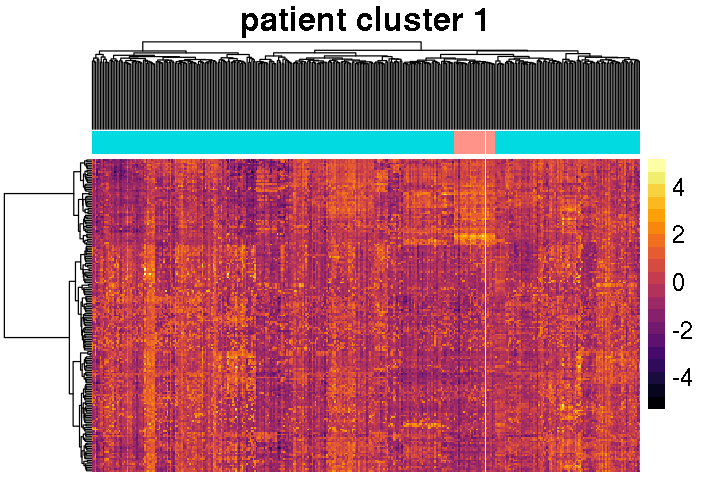

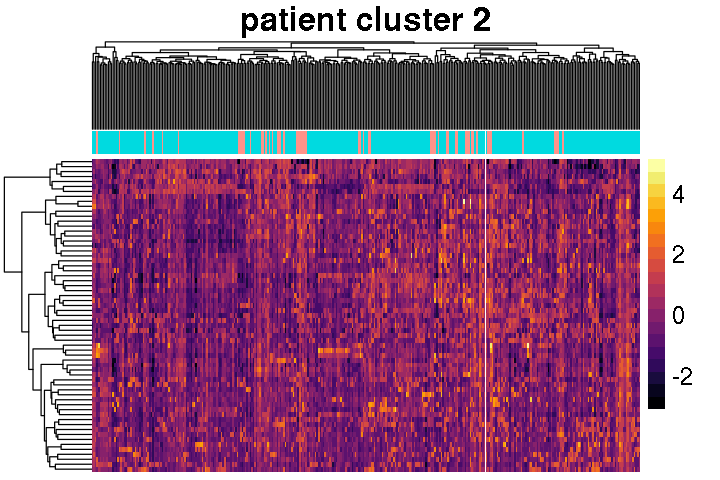

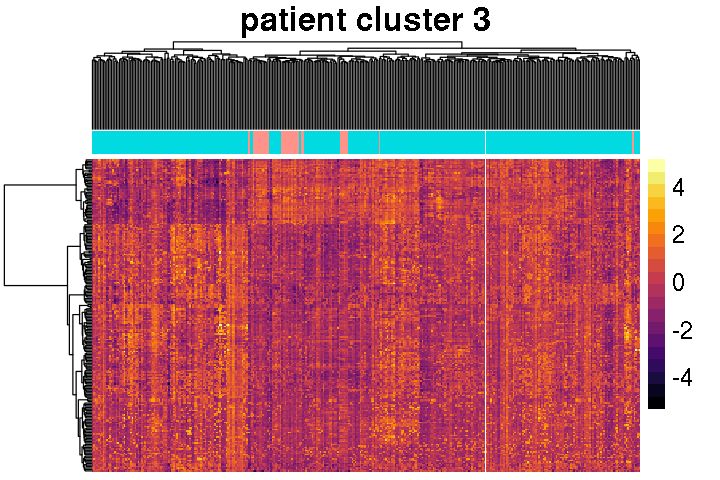

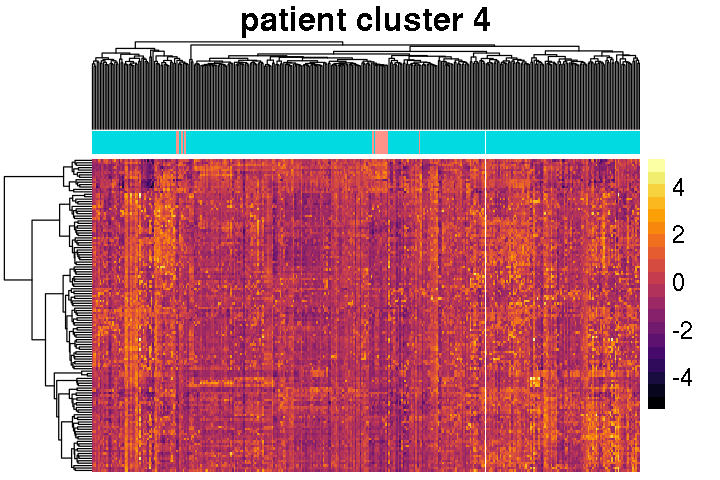

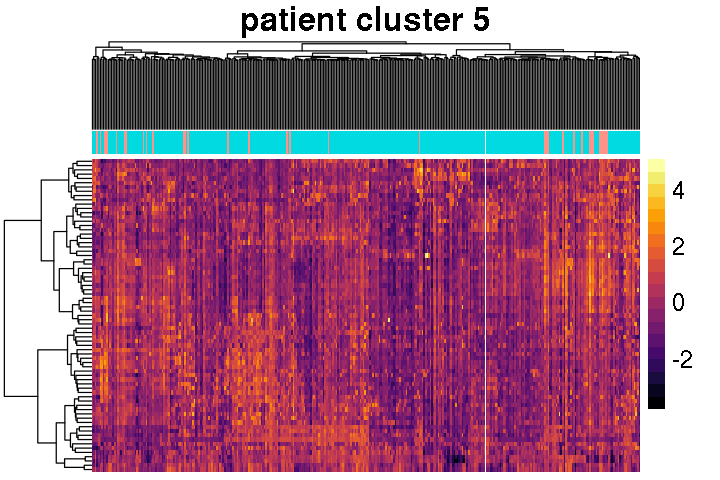

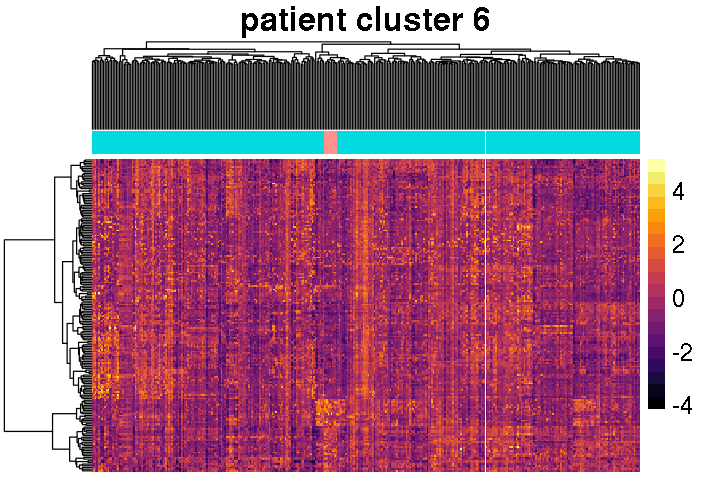

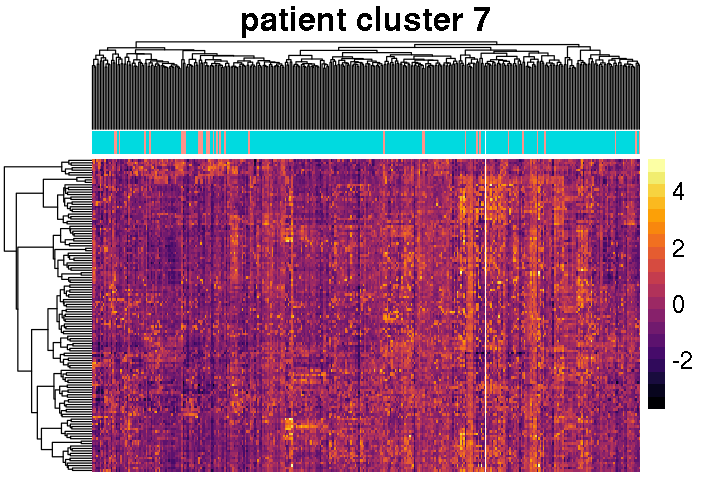

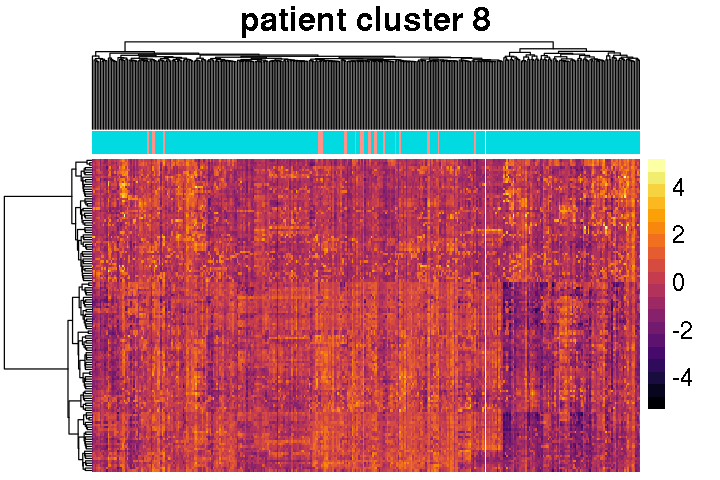

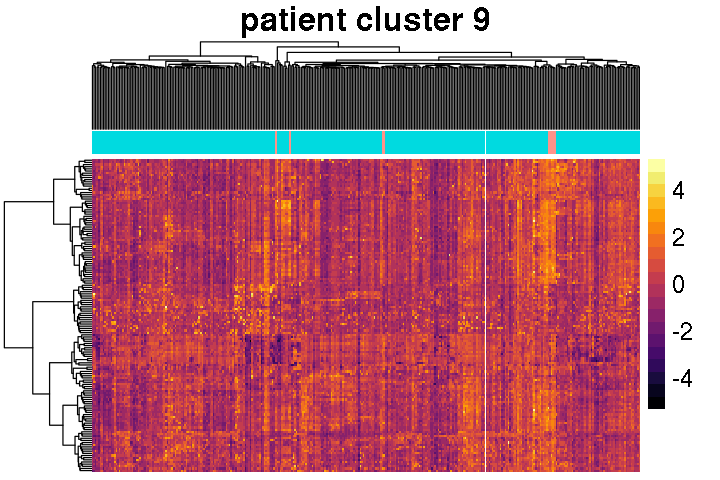

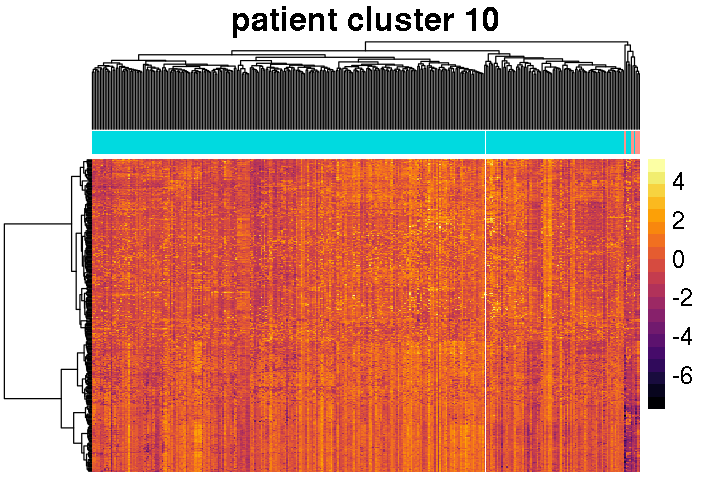

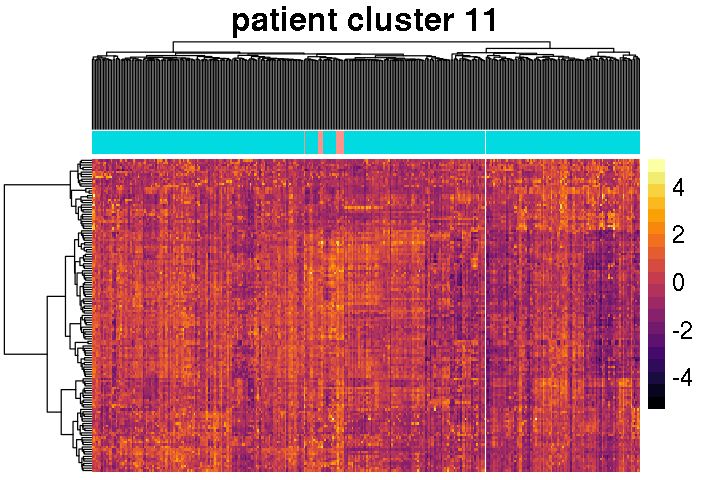

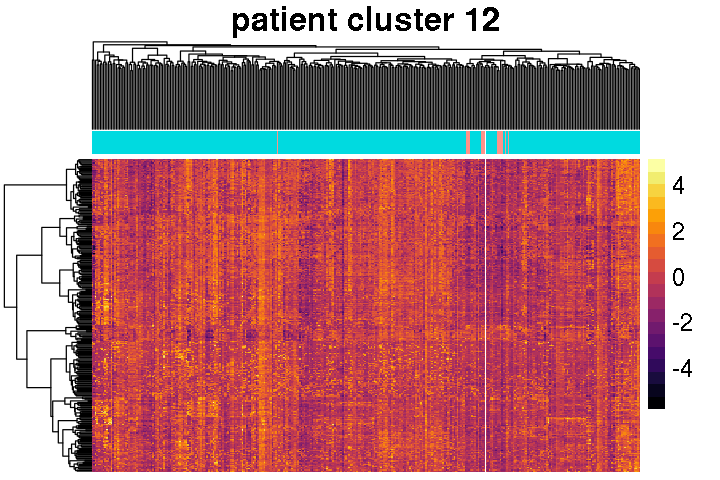

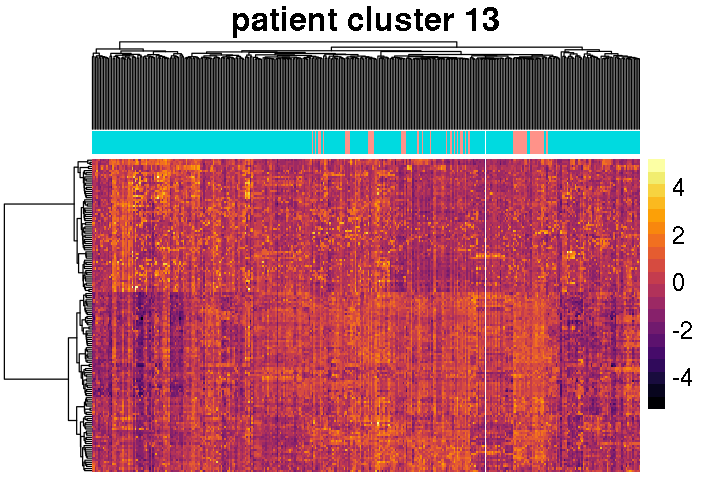

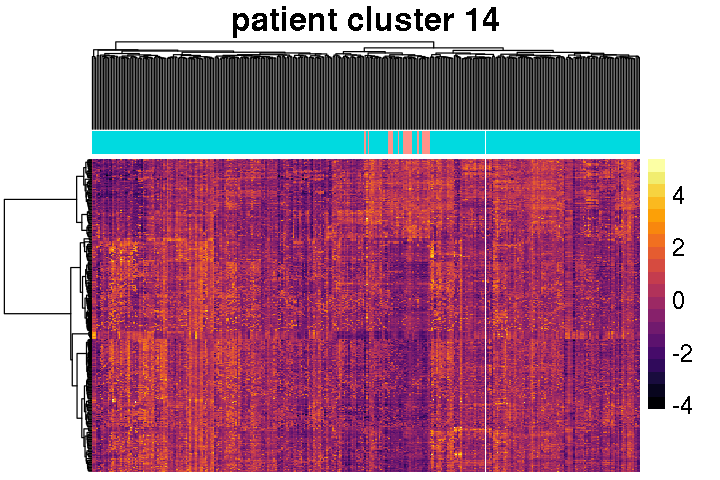

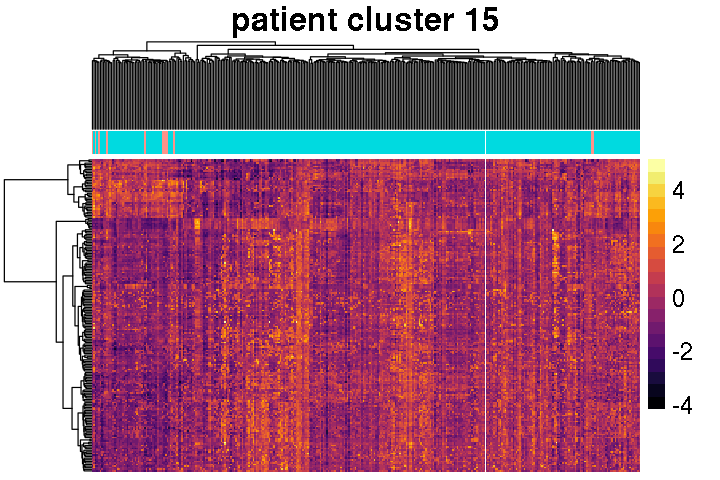

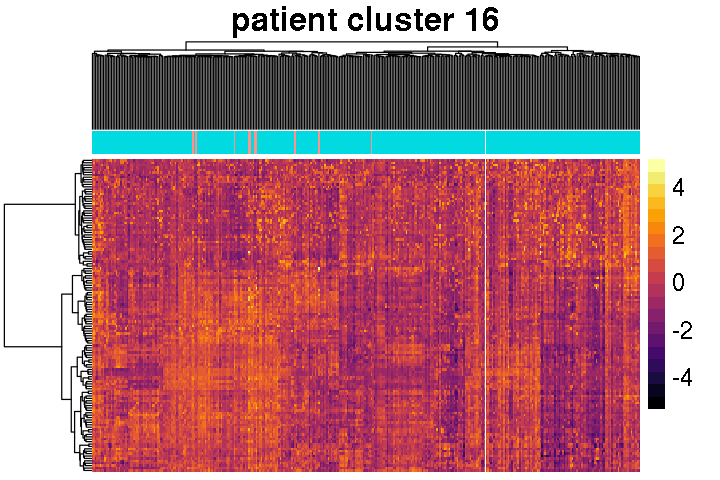

In [286]:
options(repr.plot.width=6, repr.plot.height=4)
plotCluster(1:16)

### Methylation aberrant signature derived from comparison with normal samples for each cluster does not well represent the patient cluster. The patient cluster doesn't all cluster together. 

## Clustering using methylation probes with sd > 1 across patients

In [231]:
cluster.data <- methylation.filtered[,-seq(2)]
cluster.cor <- t(apply(cluster.data, 1, function(x) scale(x)))
colnames(cluster.zscore) <- colnames(cluster.data)

In [227]:
ID = rep(0, dim(cluster.zscore)[2])
for (i in seq(n)) {
    ID[colnames(cluster.zscore) %in% patients.map[[patients.id[[i]]]]] <- i
}
annotation = data.frame(ID=factor(ID))
rownames(annotation) = colnames(cluster.zscore)

In [225]:
table(ID)

ID
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 
26 55 31 14 34  8 31 24  9  6  9 12 45 18 12 10 

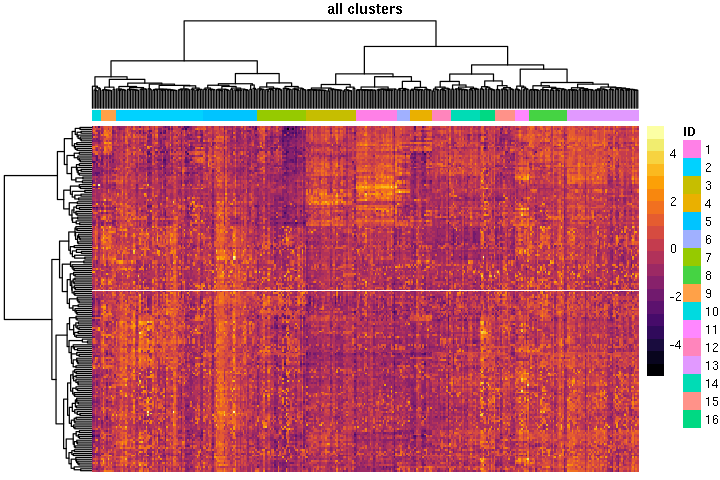

In [284]:
# clustering columns by Figueroa 2009 ( 1-pearson with lingoes transformation to euclidean space ) and rows by euclidean
res <- pheatmap(
          mat               = cluster.zscore, 
          annotation_col    = annotation,
          annotation_legend = T,
          annotation_names_col = F,
          color             = inferno(20),
          border_color      = NA,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_cols      = clustering,
          cluster_distance_rows = 'euclidean',
          clustering_method = 'ward.D2',
          fontsize          = 7,
          main              = paste0("all clusters")
        )

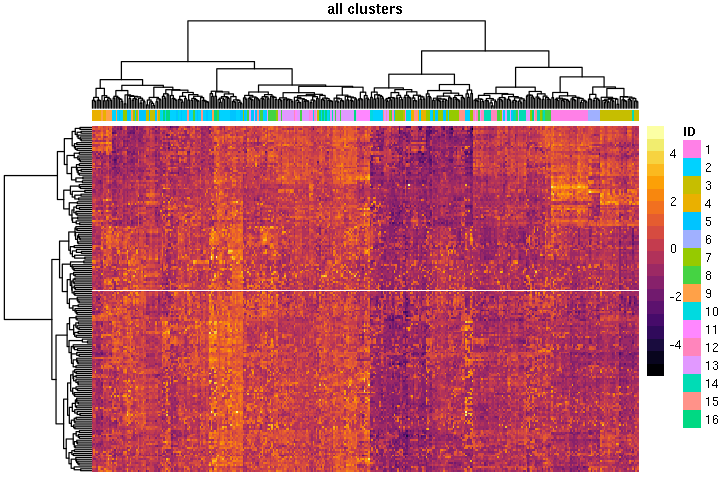

In [289]:
# clustering rows and columns both by correlation
res <- pheatmap(
          mat               = cluster.zscore, 
          annotation_col    = annotation,
          annotation_legend = T,
          annotation_names_col = F,
          color             = inferno(20),
          border_color      = NA,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_distance_cols = 'correlation',
          cluster_distance_rows = 'correlation',
          clustering_method = 'ward.D2',
          fontsize          = 7,
          main              = paste0("all clusters")
        )

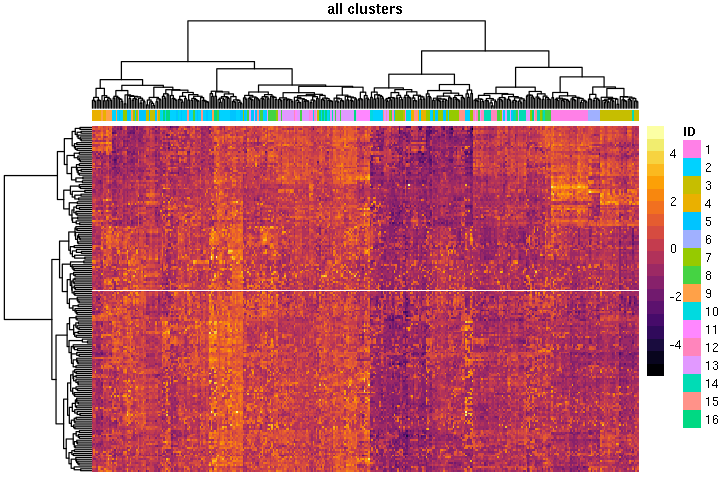

In [287]:
# clustering rows and columns both by euclidean distance
res <- pheatmap(
          mat               = cluster.zscore, 
          annotation_col    = annotation,
          annotation_legend = T,
          annotation_names_col = F,
          color             = inferno(20),
          border_color      = NA,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_distance_cols = 'euclidean',
          cluster_distance_rows = 'euclidean',
          clustering_method = 'ward.D2',
          fontsize          = 7,
          main              = paste0("all clusters")
        )